# Sales Prediction

### Aim:
 - Predict sales
 - O/P: (Approx.) Between 0.0 to 30.0

Dataset: [Click Here](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)

Auth: KG   
Date: 10.05.2024

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('Data/advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.duplicated().sum()

0

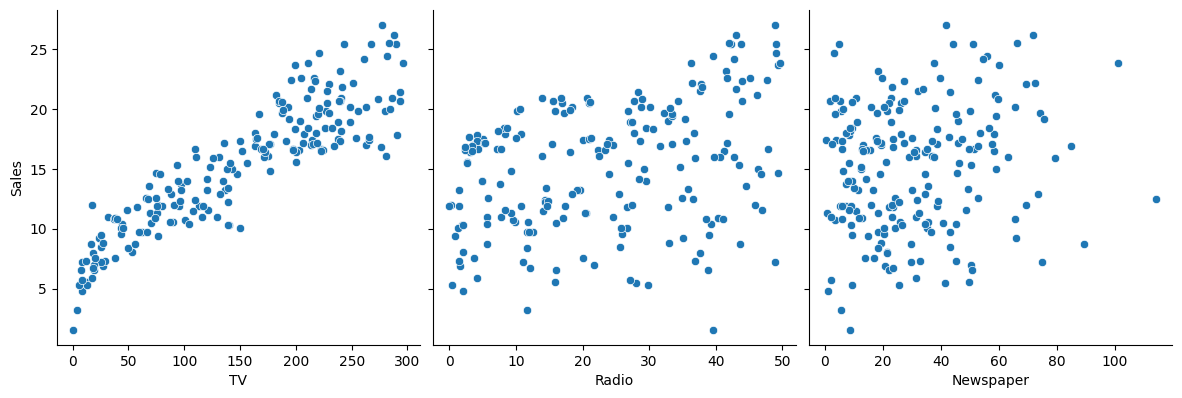

In [7]:
sb.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars=['Sales'], kind = 'scatter', aspect = 1, height = 4)

In [8]:
test_data = data.drop(columns=['Sales'])
test_data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
sales = data['Sales']
sales

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(test_data, sales, test_size=0.25, random_state=43)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(150, 3) (50, 3) (150,) (50,)


In [11]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
RandomForestRegressor()

RandomForestRegressor()

In [12]:
X_test_prediction = model.predict(X_test)

mse = mean_squared_error(Y_test, X_test_prediction)
mae = mean_absolute_error(Y_test, X_test_prediction)
r2 = r2_score(Y_test, X_test_prediction)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

results = pd.DataFrame({
    'Actual': Y_test,  # Actual target values
    'Predicted': X_test_prediction  # Predicted target values
})

results['Squared Error'] = (results['Actual'] - results['Predicted'])**2  # Squared errors
results['Absolute Error'] = abs(results['Actual'] - results['Predicted'])  # Absolute errors
results

Mean Squared Error: 1.4323421999999986
Mean Absolute Error: 0.8629599999999974
R-squared (R2) Score: 0.9497981892691648


,Actual,Predicted,Squared Error,Absolute Error
56,5.5,6.002,0.252004,0.502
37,14.7,13.883,0.667489,0.817
67,13.4,11.700,2.890000,1.700
79,11.0,11.483,0.233289,0.483
80,11.8,12.114,0.098596,0.314
188,20.9,18.968,3.732624,1.932
183,26.2,25.149,1.104601,1.051
10,12.6,9.365,10.465225,3.235
128,24.7,22.599,4.414201,2.101
62,20.7,19.083,2.614689,1.617


In [13]:
def test_model(model, input_values):
    predictions = model.predict(input_values)
    return predictions

In [14]:
input_values = [[330.1, 37.8, 69.2]]

predictions = test_model(model, input_values)
print(predictions)

[22.369]


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
